<div id='top'></div>

# **1976-2008 summer OLYMPICS** 

**The modern Olympic Games or Olympics are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world's foremost sports competition with more than 200 nations participating.The Olympic Games are normally held every four years, alternating between the Summer and Winter Olympics every two years in the four-year period.**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png)

The Olympic symbol – widely known throughout the world as the Olympic rings – is the visual ambassador of olympism for billions of people.
Based on a design first created by Pierre de Coubertin, the Olympic rings remain a global representation of the Olympic Movement and its activity.
Definition

“The Olympic symbol consists of five interlaced rings of equal dimensions (the Olympic rings), used alone, in one or in five different colours. When used in its five-colour version, these colours shall be, from left to right, blue, yellow, black, green and red. The rings are interlaced from left to right; the blue, black and red rings are situated at the top, the yellow and green rings at the bottom in accordance with the following graphic reproduction.” (Olympic Charter, Rule 8)

Meaning

“The Olympic symbol expresses the activity of the Olympic Movement and represents the union of the five continents and the meeting of athletes from throughout the world at the Olympic Games.” (Olympic Charter, Rule 8)

**go to [bottom](#bottom)**

<div id='content'></div>

## Index of Content

* [**1.0 Importing the modules**](#Chapter1)
* [**2.0 Data Importing**](#Chapter2)
* [**3.0 Data Cleaning**](#Chapter3)
* [**4.0 Top performers in each Olympics**](#Chapter4)
* [**5.0 Russia–United States rivalry**](#Chapter5)
 * [5.1 1976 olympics boycott](#1976)
 * [5.2 1980 Olympics boycott](#1980)
 * [5.3 1984 Olympics boycott](#1984)
* [**6.0 Male vs Female athletes at OLYMPICS**](#Chapter6)
 * [6.1 top 3 female athletes(1976-2008)](#female)
 * [6.2 top 3 male athletes(1976-2008)](#male)
 * [6.3 Mixed-sex sports](#mixed)
* [**7.0 India at Olympics**](#Chapter7)
* [**8.0 Top 10 medal winning nations**](#Chapter8)
 * [8.1 top 10 countries with gold](#gold)
 * [8.2 top 10 countries with silver](#silver)
 * [8.3 top 10 countries with bronze](#bronze)
* [**9.0 Word Clouds**](#Chapter9)
 * [9.1 top sports](#topsports)
 * [9.2 top athletes](#topathletes)
 * [9.3 top events](#topevents)
* [**10.0 Conclusion**](#Chapter10)

<div id='Chapter1'></div>

## 1.0 Importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from urllib.request import urlopen
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

<div id='Chapter2'></div>

## 2.0 Data Importing

This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period. This dataset is intended for beginners so that they can get a taste of advanced Excel functions which is perhaps one of the key skills required to be a great data scientist. I too got my hands dirty with the dataset and played with some advanced Excel functions. Further, this dataset can also be used for a predictive model as to which country is likely to fetch the highest number of gold in a particular sports category (just an example), etc.

**Contents**
* **City** - City in which the Olympic Games were held
* **Year** - Year in which the Olympic Games were held
* **Sport** - Sport Category (eg. Aquatics, Atheletics etc.)
* **Discipline** - The discipline within the sport (eg. Diving, Swimming etc.)
* **Event** - Event Name within the particular discipline (eg. 3m springboard, 10m platform etc.)
* **Athlete** - Winner Name in that event
* **Gender** - Gender
* **Country_Code** - 3 character country code
* **Country** - Country to which the winning athlete belongs to
* **Event_gender** - Genders which participated in the event (Male, Female or Common Event)
* **Medal** - Medal (eg. Bronze, Silver, Gold)

In [2]:
data = pd.read_csv('../input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv',encoding='latin-1')

In [3]:
data.head()

City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze

<div id='Chapter3'></div>

## 3.0 Data Cleaning

In [4]:
for i in range(len(data)):
    try:
        temp = data['Athlete'][i].split(', ')
        if len(temp)==2:
            temp[0],temp[1] = temp[1],temp[0]
            data['Athlete'][i] = ' '.join(temp)
        elif len(temp)==3:
            temp.pop()
            temp[0],temp[1] = temp[1],temp[0]
            data['Athlete'][i] = ' '.join(temp)
    except AttributeError:
        pass
    
data.isna().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [5]:
data.dropna(inplace=True,axis=0)

data['Year'] = data['Year'].astype('int')

city_grouped_data = data.groupby(["City"])

top_athletes = dict()
for i,j in city_grouped_data:
    top_athletes[str(i)] = dict()
    top_athletes[str(i)]['Athlete'] = j['Athlete'].value_counts().idxmax()
    top_athletes[str(i)]['noof_medals'] = dict(j['Athlete'].value_counts()[:1])[top_athletes[str(i)]['Athlete']]
    top_athletes[str(i)]['year'] = j['Year'].value_counts().idxmax()
    
top=[]
for i in top_athletes:
    top.append(top_athletes[i]['Athlete'])

for i,j in city_grouped_data:
    country_grouped_data = j.groupby(['Country'])
    for k,l in country_grouped_data:
        athlete_grouped_data  = l.groupby(['Athlete'])
        for m,n in athlete_grouped_data:
            if str(m) in top and len(n)>=6:
                top_athletes[str(i)]['sport'] = n['Sport'].value_counts().idxmax()
                top_athletes[str(i)]['medals']={'Gold':0,'Silver':0,'Bronze':0}
                temp_dict = dict(n['Medal'].value_counts())
                for medal in  ["Gold","Silver","Bronze"]:
                    try:
                        top_athletes[str(i)]['medals'][medal] = temp_dict[medal]
                    except:
                        pass
                    
for i,j in top_athletes.items():
    print(i)
    print(j)
            

Athens
{'Athlete': 'Michael PHELPS', 'noof_medals': 8, 'year': 2004, 'sport': 'Aquatics', 'medals': {'Gold': 6, 'Silver': 0, 'Bronze': 2}}
Atlanta
{'Athlete': 'Alexei NEMOV', 'noof_medals': 6, 'year': 1996, 'sport': 'Gymnastics', 'medals': {'Gold': 2, 'Silver': 1, 'Bronze': 3}}
Barcelona
{'Athlete': 'Vitaly SCHERBO', 'noof_medals': 6, 'year': 1992, 'sport': 'Gymnastics', 'medals': {'Gold': 6, 'Silver': 0, 'Bronze': 0}}
Beijing
{'Athlete': 'Michael PHELPS', 'noof_medals': 8, 'year': 2008, 'sport': 'Aquatics', 'medals': {'Gold': 8, 'Silver': 0, 'Bronze': 0}}
Los Angeles
{'Athlete': 'Ning LI', 'noof_medals': 6, 'year': 1984, 'sport': 'Gymnastics', 'medals': {'Gold': 3, 'Silver': 2, 'Bronze': 1}}
Montreal
{'Athlete': 'Nikolay ANDRIANOV', 'noof_medals': 7, 'year': 1976, 'sport': 'Gymnastics', 'medals': {'Gold': 4, 'Silver': 2, 'Bronze': 1}}
Moscow
{'Athlete': 'Aleksandr DITYATIN', 'noof_medals': 8, 'year': 1980, 'sport': 'Gymnastics', 'medals': {'Gold': 3, 'Silver': 4, 'Bronze': 1}}
Seoul
{

<div id='Chapter4'></div>

## 4.0 Top performers in each Olympics

- **1976 - Nikolay ANDRIANOV**

Andrianov won the most medals at the 1976 Summer Olympics with 6 individual medals and one team medal. Within the sport of Men's Artistic Gymnastics, he also holds the men's record for most individual Olympic medals (12) and shares the male record for most individual Olympic gold medals in gymnastics (6) with Boris Shakhlin and Dmitry Bilozerchev (the latter of which only if you count the 1984 Alternate Olympics).

- **1980 - Aleksandr DITYATIN**

Winning eight medals at the 1980 Summer Olympics, he set the record for achieving the most medals of any type at a single Olympic Games. The American swimmer Michael Phelps has now twice equalled this record, at Athens 2004 and Beijing 2008.

- **1984 - Ning LI**

Li is most famous for winning six medals at the 1984 Summer Olympics, which was the first Olympics in which the People's Republic of China participated. He won three gold medals (in floor exercise, pommel horse, and rings), two silver medals, and one bronze medal. Li became the most decorated Chinese athlete at the first Olympics that China participated in after the founding of the People's Republic in October 1949.

- **1988 - Matthew BIONDI**

Matthew Nicholas Biondi (born October 8, 1965) is an American former competition swimmer, eleven-time Olympic medalist, and former world record-holder in five events. Biondi competed in the Summer Olympic Games in 1984, 1988 and 1992, winning a total of eleven medals (eight gold, two silver and one bronze). During his career, he set three individual world records in the 50-meter freestyle and four in the 100-meter freestyle.

- **1992 - Vitaly SCHERBO**

One of the most successful gymnasts of all time, he is the only male gymnast ever to have won a world title in all 8 events (individual all-Around in 1993, team in 1991, floor in 1994, 1995 and 1996, horizontal bar in 1994, parallel bars in 1993 and 1995, pommel horse in 1992, rings in 1992, vault in 1993 and 1994). He was the most successful athlete at the 1992 Summer Olympics, winning 6 of 8 events – team, all-around, and 4 of 6 event finals.

- **1996 - Alexei NEMOV**

At the 1996 Olympics in Atlanta, Nemov seemed poised to win the gold. Nemov won six medals (two gold, one silver, and three bronze). He performed solidly in the all-around, battling World Champion Li Xiaoshuang every step of the way. Nemov ruined his chances for gold, however, when he botched his middle tumbling run in the final event, finishing second by a narrow margin.

- **2000 - Alexei NEMOV**

Nemov went into the 2000 Olympics in the best shape of his life – having never seen his newborn son (born in September 2000), and was able to take home to his son what he called a golden rattle, in reality an all-around gold medal. Except for still rings, he had won at least one Olympic medal in every other discipline of men's gymnastics by the end of the Sydney games.

- **2004 - Michael PHELPS**

In winning six gold and two bronze medals, Phelps, still a teenager, had the second-best performance ever at a single Olympics, behind Mark Spitz's seven gold medals at the 1972 Summer Olympics. Also, he became the second male swimmer ever to win more than two individual titles at a single Games with four, tying Spitz's four from 1972.

- **2008 - Michael PHELPS**

On August 17, Phelps won his eighth gold medal in the 4×100-meter medley relay, breaking Mark Spitz's record of seven gold medals won in a single Olympic Games, which had stood since 1972. Phelps, along with teammates Brendan Hansen, Aaron Peirsol, and Jason Lezak, set a new world record in the event with a time of 3 minutes and 29.34 seconds, 0.7 seconds ahead of second-place Australia and 1.34 seconds faster than the previous record set by the United States at the 2004 Olympic Games in Athens. When Phelps dived in to swim the 100-meter butterfly leg, the third leg of the 400-meter medley, the United States had been trailing Australia and Japan. Phelps completed his split in 50.1 seconds, the fastest butterfly split ever for the event, giving teammate Jason Lezak a more than half-second lead for the final leg, which he held onto to clinch the event in world record time. Said Phelps, upon completing the event that awarded him his eighth gold medal and eighth Olympic record in as many events, "Records are always made to be broken no matter what they are ... Anybody can do anything that they set their mind to."

**go to [Index](#content)**

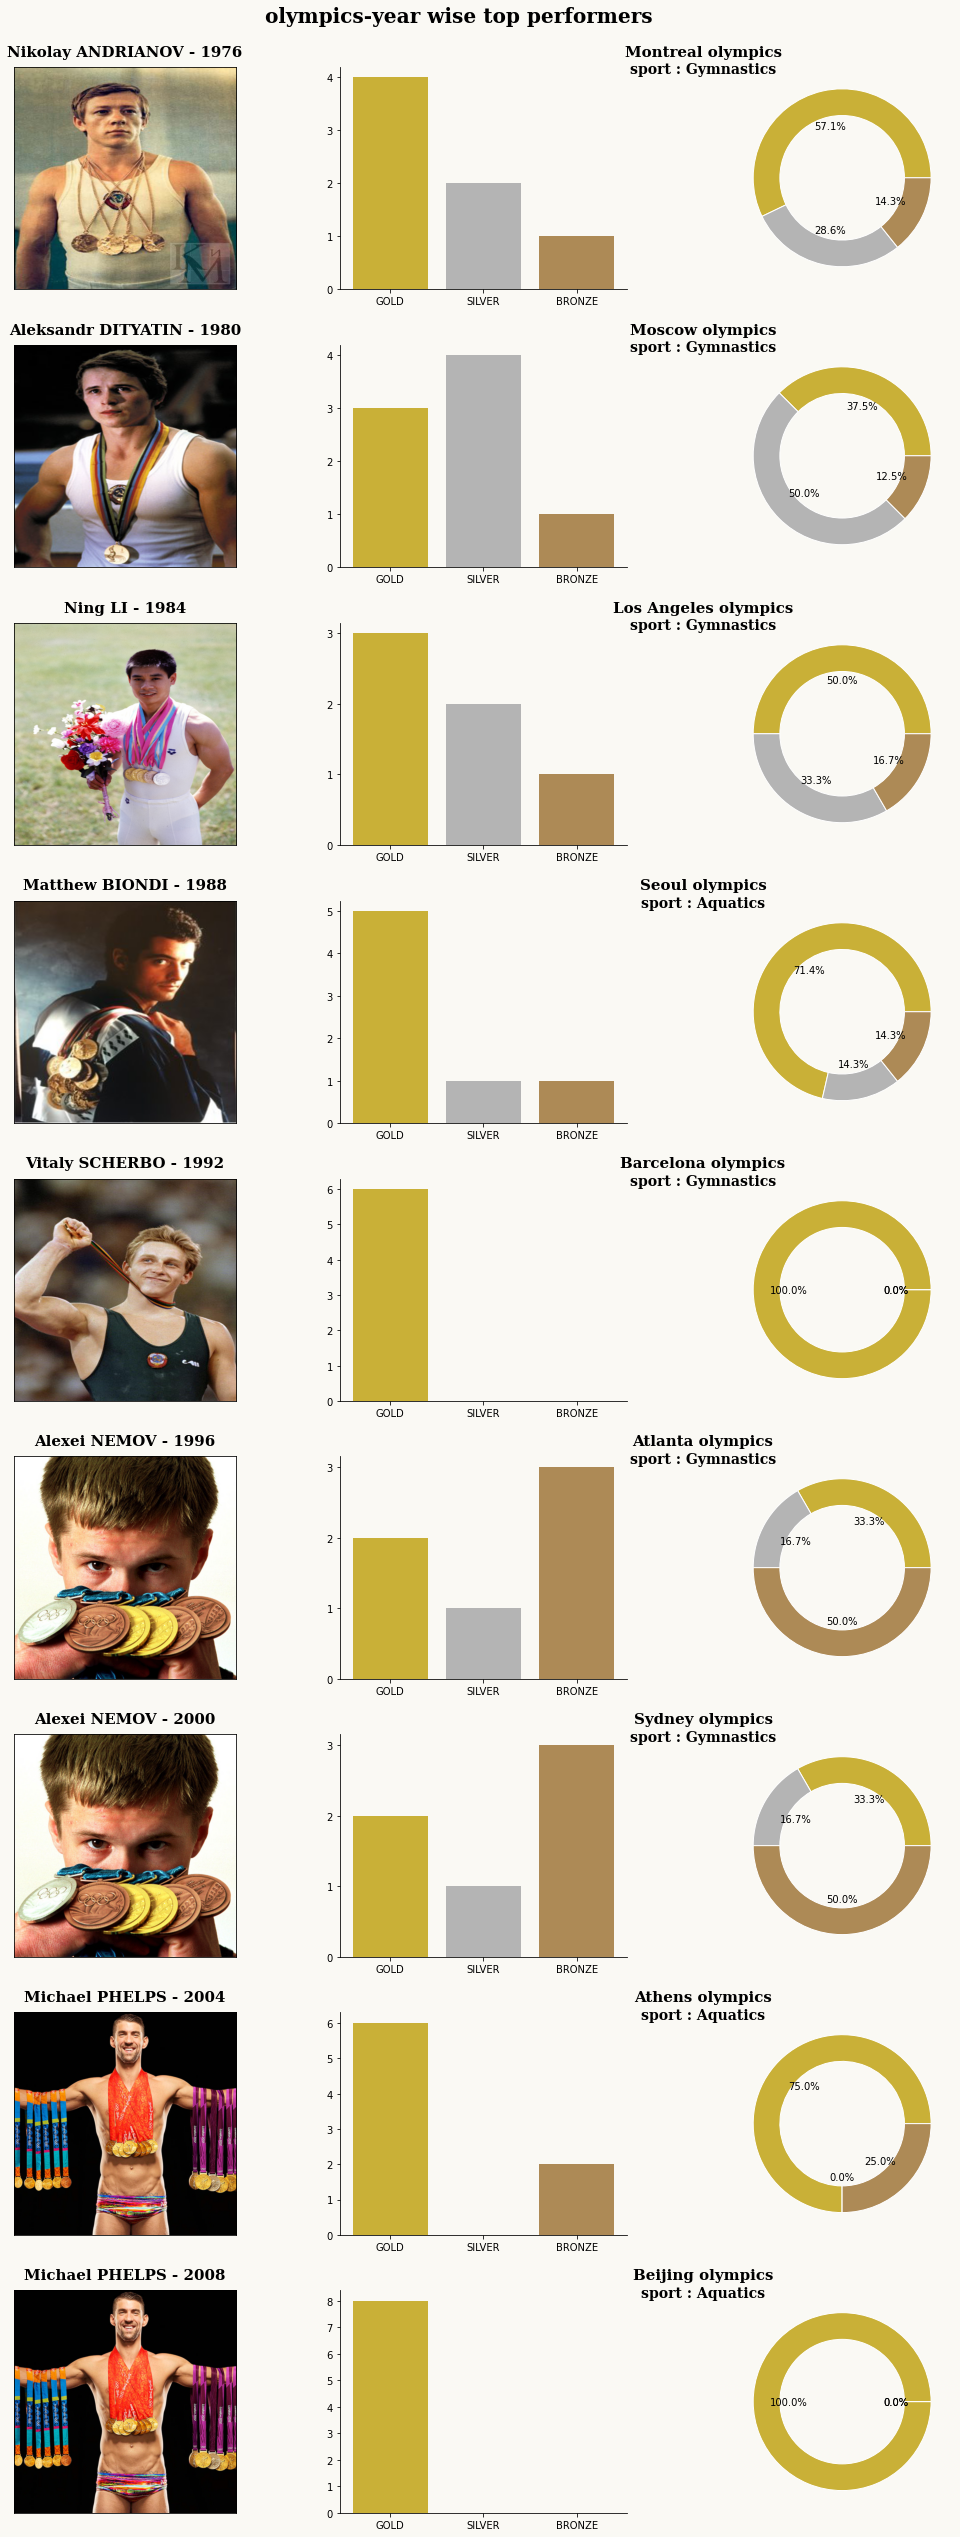

In [6]:
url1 = 'https://www.si.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTY4MTI1Nzk0OTk0NTYyMzIx/michael-phelps-olympics-sports-illustrated-cover-storyjpg.jpg'
url2 = 'https://lifestyle-journal.ru/netcat_files/userfiles/nemov_home_champion_2.jpg'
url3 = 'https://olympics.nbcsports.com/wp-content/uploads/sites/10/2015/04/vitaly-scherbo.jpg?w=432'
url4 = 'https://www.si.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTY4MTI1Nzk0OTk0NTYyMzIx/michael-phelps-olympics-sports-illustrated-cover-storyjpg.jpg'
url5 = 'https://fuckingyoung.es/wp-content/uploads/2020/10/lining_interview_fy3.jpg'
url6 = 'https://www.tourism33.ru/tourism/upload/information_system_27/4/1/6/item_416/information_items_416.jpg'
url7 = 'http://www.chinadaily.com.cn/olympics/images/attachement/jpg/site1/20070725/001aa018ff9c08114abc07.jpg'
url8 = 'https://www.lamorindaweekly.com/archive/issue1509/images/1509-02702.jpg'
url9 = 'https://lifestyle-journal.ru/netcat_files/userfiles/nemov_home_champion_2.jpg'


fig = plt.figure(figsize=(18,45)) # create figure
gs = fig.add_gridspec(9, 3)
gs.update(wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax0_1 = fig.add_subplot(gs[0, 1])
ax0_2 = fig.add_subplot(gs[0, 2])
ax1 = fig.add_subplot(gs[1, 0])
ax1_1 = fig.add_subplot(gs[1, 1])
ax1_2 = fig.add_subplot(gs[1, 2])
ax2 = fig.add_subplot(gs[2, 0])
ax2_1 = fig.add_subplot(gs[2, 1])
ax2_2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 0])
ax3_1 = fig.add_subplot(gs[3, 1])
ax3_2 = fig.add_subplot(gs[3, 2])
ax4 = fig.add_subplot(gs[4, 0])
ax4_1 = fig.add_subplot(gs[4, 1])
ax4_2 = fig.add_subplot(gs[4, 2])
ax5 = fig.add_subplot(gs[5, 0])
ax5_1 = fig.add_subplot(gs[5, 1])
ax5_2 = fig.add_subplot(gs[5, 2])
ax6 = fig.add_subplot(gs[6, 0])
ax6_1 = fig.add_subplot(gs[6, 1])
ax6_2 = fig.add_subplot(gs[6, 2])
ax7 = fig.add_subplot(gs[7, 0])
ax7_1 = fig.add_subplot(gs[7, 1])
ax7_2 = fig.add_subplot(gs[7, 2])
ax8 = fig.add_subplot(gs[8, 0])
ax8_1 = fig.add_subplot(gs[8, 1])
ax8_2 = fig.add_subplot(gs[8, 2])


# Change background color
background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax0_1.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax1_1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax2_1.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax3_1.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax4_1.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax5_1.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax6_1.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax7_1.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color
ax8_1.set_facecolor(background_color) # axes background color

ax0.text(2000, -200, 'olympics-year wise top performers', fontsize=20, fontweight='bold', fontfamily='serif', horizontalalignment='center')
img = Image.open(urlopen(url6))
img = img.resize((1000,1000))
ax0.tick_params(left=False, bottom=False)
ax0.imshow(img)
ax0.text(500, -50, 'Nikolay ANDRIANOV - 1976', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax0.text(3100, -50, 'Montreal olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax0.text(3100, 30, f"sport : {top_athletes['Montreal']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax0_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Montreal']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax0_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax0_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax0_2.pie(list(top_athletes['Montreal']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url7))
img = img.resize((1000,1000))
ax1.tick_params(left=False, bottom=False)
ax1.imshow(img)
ax1.text(500, -50, 'Aleksandr DITYATIN - 1980', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax1.text(3100, -50, 'Moscow olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax1.text(3100, 30, f"sport : {top_athletes['Moscow']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax1_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Moscow']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax1_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax1_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax1_2.pie(list(top_athletes['Moscow']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url5))
img = img.resize((1000,1000))
ax2.tick_params(left=False, bottom=False)
ax2.imshow(img)
ax2.text(500, -50, 'Ning LI - 1984', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax2.text(3100, -50, 'Los Angeles olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax2.text(3100, 30, f"sport : {top_athletes['Los Angeles']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Los Angeles']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax2_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax2_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax2_2.pie(list(top_athletes['Los Angeles']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url8))
img = img.resize((1000,1000))
ax3.tick_params(left=False, bottom=False)
ax3.imshow(img)
ax3.text(500, -50, 'Matthew BIONDI - 1988', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax3.text(3100, -50, 'Seoul olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax3.text(3100, 30, f"sport : {top_athletes['Seoul']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax3.set_xticklabels([])
ax3.set_yticklabels([])

ax3_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Seoul']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax3_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax3_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax3_2.pie(list(top_athletes['Seoul']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url3))
img = img.resize((1000,1000))
ax4.tick_params(left=False, bottom=False)
ax4.imshow(img)
ax4.text(500, -50, 'Vitaly SCHERBO - 1992', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax4.text(3100, -50, 'Barcelona olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax4.text(3100, 30, f"sport : {top_athletes['Barcelona']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax4.set_xticklabels([])
ax4.set_yticklabels([])

ax4_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Barcelona']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax4_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax4_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax4_2.pie(list(top_athletes['Barcelona']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url2))
img = img.resize((1000,1000))
ax5.tick_params(left=False, bottom=False)
ax5.imshow(img)
ax5.text(500, -50, 'Alexei NEMOV - 1996', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax5.text(3100, -50, 'Atlanta olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax5.text(3100, 30, f"sport : {top_athletes['Atlanta']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax5.set_xticklabels([])
ax5.set_yticklabels([])

ax5_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Atlanta']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax5_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax5_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax5_2.pie(list(top_athletes['Atlanta']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url9))
img = img.resize((1000,1000))
ax6.tick_params(left=False, bottom=False)
ax6.imshow(img)
ax6.text(500, -50, 'Alexei NEMOV - 2000', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax6.text(3100, -50, 'Sydney olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax6.text(3100, 30, f"sport : {top_athletes['Sydney']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax6.set_xticklabels([])
ax6.set_yticklabels([])

ax6_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Sydney']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax6_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax6_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax6_2.pie(list(top_athletes['Sydney']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url1))
img = img.resize((1000,1000))
ax7.tick_params(left=False, bottom=False)
ax7.imshow(img)
ax7.text(500, -50, 'Michael PHELPS - 2004', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax7.text(3100, -50, 'Athens olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax7.text(3100, 30, f"sport : {top_athletes['Athens']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax7.set_xticklabels([])
ax7.set_yticklabels([])

ax7_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Athens']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax7_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax7_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax7_2.pie(list(top_athletes['Athens']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

img = Image.open(urlopen(url4))
img = img.resize((1000,1000))
ax8.tick_params(left=False, bottom=False)
ax8.imshow(img)
ax8.text(500, -50, 'Michael PHELPS - 2008', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax8.text(3100, -50, 'Beijing olympics', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax8.text(3100, 30, f"sport : {top_athletes['Beijing']['sport']}", fontsize=14, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax8.set_xticklabels([])
ax8.set_yticklabels([])

ax8_1.bar(x=['GOLD','SILVER','BRONZE'],height=list(top_athletes['Beijing']['medals'].values()), color=['#C9B037','#B4B4B4','#AD8A56'])
ax8_1.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax8_1.yaxis.set_major_locator(mtick.MultipleLocator(1))

ax8_2.pie(list(top_athletes['Beijing']['medals'].values()),autopct='%1.1f%%', radius=1, colors=['#C9B037','#B4B4B4','#AD8A56'],wedgeprops=dict(width=0.3, edgecolor='w'))

for s in ["top","right"]:
    ax0_1.spines[s].set_visible(False)
    ax1_1.spines[s].set_visible(False)
    ax2_1.spines[s].set_visible(False)
    ax3_1.spines[s].set_visible(False)
    ax4_1.spines[s].set_visible(False)
    ax5_1.spines[s].set_visible(False)
    ax6_1.spines[s].set_visible(False)
    ax7_1.spines[s].set_visible(False)
    ax8_1.spines[s].set_visible(False)

plt.show()

In [7]:
US_medals = dict()
Russia_medals = dict()
for i,j in city_grouped_data:
    country_grouped_data = j.groupby(['Country'])
    for k,l in country_grouped_data:
        if k == 'United States':
            US_medals[j.Year.max()] = len(l)
        elif k == 'Soviet Union' or k == 'Russia' or k == 'Unified team':
            Russia_medals[j.Year.max()] = len(l)
US_medals[1980]=0
Russia_medals[1984]=0

for i,j in city_grouped_data:
    if i=='Moscow':
        oly_1980 = dict(j['Country'].value_counts()[:5])
        oly_1980['United States']=0
        oly_1980 = sorted(oly_1980.items(),reverse=True)
    elif i=='Los Angeles':
        oly_1984 = dict(j['Country'].value_counts()[:5])
        oly_1984['Soviet Union']=0
        oly_1984 = sorted(oly_1984.items(),reverse=True)
        
        
medals_US = dict()
medals_USSR = dict()
for i,j in city_grouped_data:
    country_grouped_data = j.groupby(['Country'])
    for k,l in country_grouped_data:
        if k == 'United States':
            medals_US[j.Year.max()] = dict(l['Medal'].value_counts())
        elif k == 'Soviet Union' or k == 'Russia' or k == 'Unified team': 
            medals_USSR[j.Year.max()] = dict(l['Medal'].value_counts())
            
medals_US[1980] = {'Gold':0,'Silver':0,'Bronze':0}
medals_USSR[1984] = {'Gold':0,'Silver':0,'Bronze':0}

print('US medals')
medals_US

US medals


{2004: {'Gold': 116, 'Silver': 75, 'Bronze': 73},
 1996: {'Gold': 160, 'Bronze': 52, 'Silver': 48},
 1992: {'Gold': 89, 'Bronze': 85, 'Silver': 50},
 2008: {'Gold': 125, 'Silver': 109, 'Bronze': 81},
 1984: {'Gold': 168, 'Silver': 115, 'Bronze': 50},
 1976: {'Gold': 63, 'Silver': 56, 'Bronze': 36},
 1988: {'Gold': 77, 'Silver': 64, 'Bronze': 52},
 2000: {'Gold': 130, 'Silver': 66, 'Bronze': 52},
 1980: {'Gold': 0, 'Silver': 0, 'Bronze': 0}}

In [8]:
print('USSR medals')
medals_USSR

USSR medals


{2004: {'Bronze': 96, 'Silver': 49, 'Gold': 47},
 1996: {'Silver': 45, 'Gold': 36, 'Bronze': 34},
 1992: {'Gold': 92, 'Bronze': 66, 'Silver': 65},
 2008: {'Bronze': 56, 'Silver': 44, 'Gold': 43},
 1976: {'Gold': 113, 'Silver': 93, 'Bronze': 79},
 1980: {'Gold': 192, 'Silver': 127, 'Bronze': 123},
 1988: {'Gold': 134, 'Bronze': 95, 'Silver': 65},
 2000: {'Silver': 68, 'Gold': 66, 'Bronze': 54},
 1984: {'Gold': 0, 'Silver': 0, 'Bronze': 0}}

<div id="Chapter5"></div>

## 5.0 Russia–United States rivalry

Russia (in all its incarnations) and the United States have won more Olympic medals than any other nation. Russia topped the overall medal count at 7 Summer Olympics and 9 Winter Olympics, while the United States placed first at 18 Summer Olympics and 1 Winter Olympics. The countries developed a strong rivalry during the Cold War, and while the tensions eased in the 1990s, the relations deteriorated in 2014 and 2016.

Since the 1952 Summer Olympics, the United States has won 1986 Summer and Winter Olympics medals, the most in that period, while Russia has won 1973 medals, the second most in that period.

![](https://www.worldtrips.com/-/media/Project/TMHCC-MIS/HCCMISdotcom/Blog-Posts/travel/us-russia-rivalry-featured-image-headerjpg.jpg?h=400&w=1280&hash=A5C8ACB6DDD508E3216990E3287B1D8C)

<div id="1976"></div>

#### 5.1 The 1976 Summer Olympics boycott

The Montreal 1976 Olympics was boycotted by 29 countries due to the refusal of the IOC to ban New Zealand, after the New Zealand national rugby union team had toured South Africa earlier in 1976. The boycott was led by Congolese official Jean Claude Ganga. Some of the boycotting nations (including Morocco, Cameroon and Egypt) had already participated, however, and withdrew after the first few days. Senegal and Ivory Coast were the only African countries that competed throughout the duration of the Games. Elsewhere, both Iraq and Guyana also opted to join the Congolese-led boycott. South Africa had been banned from the Olympics since 1964 due to its apartheid policies. Other countries, such as El Salvador and Zaire, did not participate in Montreal because of economic reasons. The republic of China also boycotted the olympics.

![](https://upload.wikimedia.org/wikipedia/commons/c/ca/1976_Summer_Olympics_%28Montr%C3%A9al%29_boycotting_countries_%28blue%29.png)

**go to [Index](#content)**

<div id="1980"></div>

#### 5.2 The 1980 Summer Olympics boycott

The 1980 Summer Olympics boycott was one part of a number of actions initiated by the United States to protest against the Soviet invasion of Afghanistan. The Soviet Union, which hosted the 1980 Summer Olympics in Moscow, and its allies later boycotted the 1984 Summer Olympics in Los Angeles. For more information on the [1980 Olympics Boycott](https://en.wikipedia.org/wiki/1980_Summer_Olympics_boycott)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/1980_Summer_Olympics_%28Moscow%29_boycotting_countries_%28blue%29.png/1200px-1980_Summer_Olympics_%28Moscow%29_boycotting_countries_%28blue%29.png)

**go to [Index](#content)**

<div id="1984"></div>

#### 5.3 The 1984 Summer Olympics boycott

The boycott of the 1984 Summer Olympics in Los Angeles followed four years after the American-led boycott of the 1980 Summer Olympics in Moscow. The boycott involved 14 Eastern Bloc countries and allies, led by the Soviet Union, which initiated the boycott on May 8, 1984. Boycotting countries organized another major event, called the Friendship Games, in July and August 1984. Although the boycott led by the Soviet Union affected Olympic events that were normally dominated by the absent countries, 140 nations still took part in the games, which was a record at the time. For more information on the [1984 Olympics Boycott](https://en.wikipedia.org/wiki/1984_Summer_Olympics_boycott)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/1984_Summer_Olympics_%28Los_Angeles%29_boycotting_countries_%28blue%29.png/1200px-1984_Summer_Olympics_%28Los_Angeles%29_boycotting_countries_%28blue%29.png)

**go to [Index](#content)**

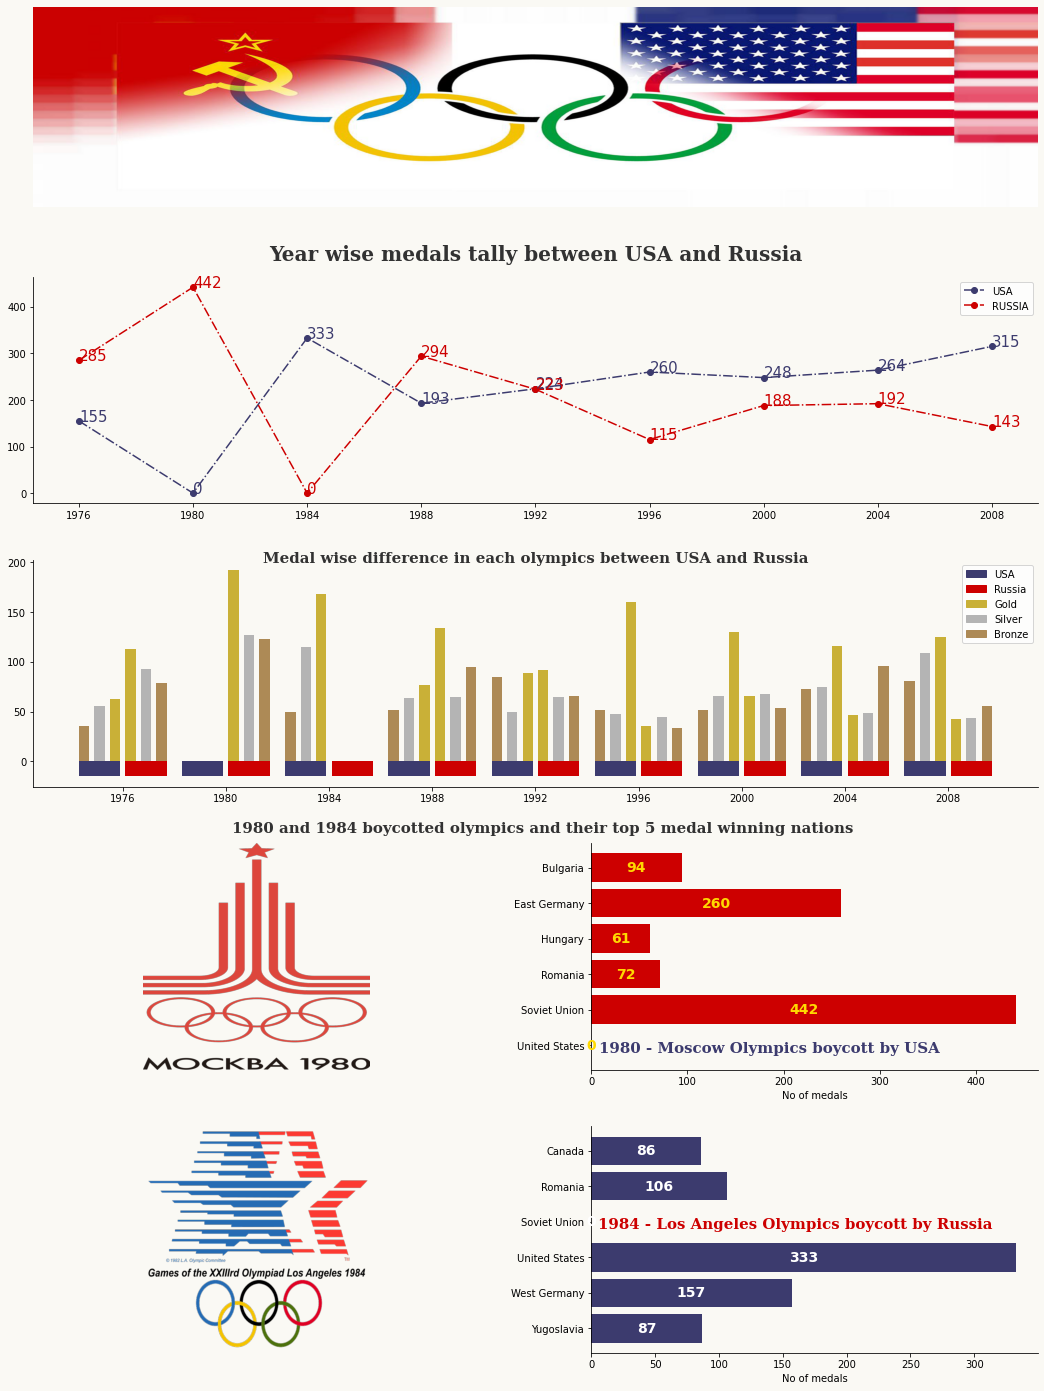

In [9]:
fig = plt.figure(figsize=(18,25),facecolor='#faf9f4')
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.25, hspace=0.25)

ax0 = fig.add_subplot(gs[0, 0:])
ax1 = fig.add_subplot(gs[1, 0:])
ax2 = fig.add_subplot(gs[2, 0:])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[3, 1])
ax5 = fig.add_subplot(gs[4, 0])
ax6 = fig.add_subplot(gs[4, 1])

background_color = '#faf9f4'
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color

# Ax0 - image
img = Image.open(urlopen('https://static.euronews.com/articles/307650/1440x810_307650.jpg'))
img = img.resize((5000,1000))
ax0.tick_params(left=False, bottom=False)
ax0.imshow(img)
ax0.spines[["top","right","bottom","left"]].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# AX1 - line plot
year,medals = [],[]
for i,j in sorted(US_medals.items()):
    year.append(i)
    medals.append(j)
ax1.plot(year,medals,marker='o',zorder=3,color='#3C3B6E',ls='-.')
for i,j in zip(year, medals):
    ax1.annotate(f'{j:0.0f}',xy=(i,j), color='#3C3B6E',fontsize=15)
    
year,medals = [],[]
for i,j in sorted(Russia_medals.items()):
    year.append(i)
    medals.append(j)
ax1.plot(year,medals,marker='o',zorder=3,color='#CD0000',ls='-.')
for i,j in zip(year, medals):
    ax1.annotate(f'{j:0.0f}',xy=(i,j), color='#CD0000',fontsize=15)
    
ax1.text(1992,500,'Year wise medals tally between USA and Russia',fontsize=20, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='center')
ax1.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax1.legend(['USA','RUSSIA'])

# Ax2 - bar plot
year,medals = [],[]
for i,j in sorted(medals_US.items()):
    year.append(i)
    medals.append(j['Gold'])
a = np.arange(len(medals_US))
ax2.bar(a-0.075,height = medals,zorder=3,color='#C9B037',width=0.1)
ax2.bar(a-0.225,height = -15,zorder=3,color='#3C3B6E',width=0.4)
   
year,medals = [],[]
for i,j in sorted(medals_USSR.items()):
    year.append(i)
    medals.append(j['Gold'])
a = np.arange(len(medals_US))
ax2.bar(a+0.075,height = medals,zorder=3,color='#C9B037',width=0.1)
ax2.bar(a+0.225,height = -15,zorder=3,color='#CD0000',width=0.4)
    
year,medals = [],[]
for i,j in sorted(medals_US.items()):
    year.append(i)
    medals.append(j['Silver'])
a = np.arange(len(medals_US))
ax2.bar(a-0.225,height = medals,zorder=3,color='#B4B4B4',width=0.1)
   
year,medals = [],[]
for i,j in sorted(medals_USSR.items()):
    year.append(i)
    medals.append(j['Silver'])
a = np.arange(len(medals_USSR))
ax2.bar(a+0.225,height = medals,zorder=3,color='#B4B4B4',width=0.1)
  
year,medals = [],[]
for i,j in sorted(medals_US.items()):
    year.append(i)
    medals.append(j['Bronze'])
a = np.arange(len(medals_US))
ax2.bar(a-0.375,height = medals,zorder=3,color='#AD8A56',width=0.1)
   
year,medals = [],[]
for i,j in sorted(medals_USSR.items()):
    year.append(i)
    medals.append(j['Bronze'])
a = np.arange(len(medals_USSR))
ax2.bar(a+0.375,height = medals,zorder=3,color='#AD8A56',width=0.1)
   
ax2.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax2.xaxis.set_major_locator(mtick.MultipleLocator(1))    
ax2.set_xticklabels([0,1976,1980,1984,1988,1992,1996,2000,2004,2008])

ax2.text(4,200,'Medal wise difference in each olympics between USA and Russia',fontsize=15, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='center')
red_patch = mpatches.Patch(color='#CD0000', label='Russia')
blue_patch = mpatches.Patch(color='#3C3B6E', label='USA')
gold_patch = mpatches.Patch(color='#C9B037', label='Gold')
silver_patch = mpatches.Patch(color='#B4B4B4', label='Silver')
bronze_patch = mpatches.Patch(color='#AD8A56', label='Bronze')
ax2.legend(handles=[blue_patch, red_patch,gold_patch,silver_patch,bronze_patch])

# Ax3 - image
img = Image.open(urlopen('https://upload.wikimedia.org/wikipedia/en/thumb/c/c1/Emblem_of_the_1980_Summer_Olympics.svg/1200px-Emblem_of_the_1980_Summer_Olympics.svg.png'))
img = img.resize((1000,1000))
ax3.tick_params(left=False, bottom=False)
ax3.imshow(img)
ax3.spines[["top","right","bottom","left"]].set_visible(False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])

# Ax4 - horizontal bar plot
X = [p[1] for p in oly_1980]
Y = [p[0] for p in oly_1980]
ax4.barh(Y,X,color='#CD0000')
ax4.text(-50,6,'1980 and 1984 boycotted olympics and their top 5 medal winning nations',fontsize=15, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='center')
ax4.text(185,-0.2,'1980 - Moscow Olympics boycott by USA',fontsize=15, fontweight='bold', fontfamily='serif',color="#3C3B6E", horizontalalignment='center')
for i,j in zip(Y, X):
    ax4.annotate(f'{j:0.0f}',xy=(j/2,i), color='#FFD900', horizontalalignment='center', verticalalignment='center',fontsize=14, fontweight='bold')
ax4.set_xlabel("No of medals")

# Ax5 - image
img = Image.open(urlopen('https://i.pinimg.com/originals/e9/19/49/e9194972a14c7edac0c2eff6ea5be009.png'))
img = img.resize((1000,1000))
ax5.tick_params(left=False, bottom=False)
ax5.imshow(img)
ax5.spines[["top","right","bottom","left"]].set_visible(False)
ax5.set_xticklabels([])
ax5.set_yticklabels([])

# Ax6 - horizontal bar plot
X = [p[1] for p in oly_1984]
Y = [p[0] for p in oly_1984]
ax6.barh(Y,X,color='#3C3B6E')
ax6.text(160,2.8,'1984 - Los Angeles Olympics boycott by Russia',fontsize=15, fontweight='bold', fontfamily='serif',color="#CD0000", horizontalalignment='center')
for i,j in zip(Y, X):
    ax6.annotate(f'{j:0.0f}',xy=(j/2,i), color='#FFFFFF', horizontalalignment='center', verticalalignment='center',fontsize=14, fontweight='bold')
ax6.set_xlabel("No of medals")

for s in ["top","right"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
         
plt.show()

**go to [Index](#content)**

In [10]:
US = dict()
Russia = dict()
country_data = data.groupby(['Country'])
for i,j in country_data:
    if i == 'United States':
        US = dict(j['Sport'].value_counts())
    elif i == 'Soviet Union' or i == 'Russia' or i == 'Unified team':
        sport_data = j.groupby(['Sport'])
        for k,l in sport_data:
            if k in Russia:
                Russia[k]+=len(l)
            else:
                Russia[k]=len(l)
 

us_df = pd.DataFrame({'Sport':[],'medals':[]})
for i in US:
    us_df.loc[len(us_df.index)] = [i,int(US[i])] 
    
ussr_df = pd.DataFrame({'Sport':[],'medals':[]})
for i in Russia:
    ussr_df.loc[len(ussr_df.index)] = [i,int(Russia[i])] 
    

gender_dict = dict()
for i,j in city_grouped_data:
    gender_dict[j.Year.max()]=dict()
    gender_data = j.groupby(['Gender'])
    for k,l in gender_data:
        gender_dict[j.Year.max()][k]=dict()
        if k == 'Men':
            medal_data = l.groupby(['Medal'])
            for m,n in medal_data:
                gender_dict[j.Year.max()][k][m]=len(n)
        else:
            medal_data = l.groupby(['Medal'])
            for m,n in medal_data:
                gender_dict[j.Year.max()][k][m]=len(n)
     
    
total_gender_medals = dict()
for i,j in gender_dict.items():
    total_gender_medals[i]=dict()
    for k,l in j.items():
        count=0
        for m in l.values():
            count+=m
        total_gender_medals[i][k] = count
        
        
total_gender_medals

{2004: {'Men': 1099, 'Women': 899},
 1996: {'Men': 1082, 'Women': 777},
 1992: {'Men': 1105, 'Women': 600},
 2008: {'Men': 1110, 'Women': 932},
 1984: {'Men': 973, 'Women': 486},
 1976: {'Men': 924, 'Women': 381},
 1980: {'Men': 958, 'Women': 429},
 1988: {'Men': 1011, 'Women': 535},
 2000: {'Men': 1126, 'Women': 889}}

In [11]:
gender_dict

{2004: {'Men': {'Bronze': 376, 'Gold': 361, 'Silver': 362},
  'Women': {'Bronze': 303, 'Gold': 298, 'Silver': 298}},
 1996: {'Men': {'Bronze': 374, 'Gold': 356, 'Silver': 352},
  'Women': {'Bronze': 260, 'Gold': 259, 'Silver': 258}},
 1992: {'Men': {'Bronze': 391, 'Gold': 358, 'Silver': 356},
  'Women': {'Bronze': 205, 'Gold': 200, 'Silver': 195}},
 2008: {'Men': {'Bronze': 391, 'Gold': 362, 'Silver': 357},
  'Women': {'Bronze': 319, 'Gold': 307, 'Silver': 306}},
 1984: {'Men': {'Bronze': 338, 'Gold': 320, 'Silver': 315},
  'Women': {'Bronze': 162, 'Gold': 163, 'Silver': 161}},
 1976: {'Men': {'Bronze': 321, 'Gold': 302, 'Silver': 301},
  'Women': {'Bronze': 126, 'Gold': 127, 'Silver': 128}},
 1980: {'Men': {'Bronze': 328, 'Gold': 317, 'Silver': 313},
  'Women': {'Bronze': 144, 'Gold': 143, 'Silver': 142}},
 1988: {'Men': {'Bronze': 352, 'Gold': 334, 'Silver': 325},
  'Women': {'Bronze': 183, 'Gold': 172, 'Silver': 180}},
 2000: {'Men': {'Bronze': 386, 'Gold': 370, 'Silver': 370},
  'W

In [12]:
top_players = dict()
gender_data = data.groupby(['Gender'])
for i,j in gender_data:
    top_players[i] = dict()
    temp = j['Athlete'].value_counts().index.tolist()
    for player in temp[:3]:
        top_players[i][player] = dict()
        top_players[i][player]['medals']={'Gold':0,'Silver':0,'Bronze':0}
    athlete_data = j.groupby(['Athlete'])
    for k,l in athlete_data:
        if k in top_players[i].keys():
            temp = dict(l.Medal.value_counts())
            for medal in temp:
                top_players[i][k]['medals'][medal] = temp[medal]
                
top_players

{'Men': {'Michael PHELPS': {'medals': {'Gold': 14, 'Silver': 0, 'Bronze': 2}},
  'Alexei NEMOV': {'medals': {'Gold': 4, 'Silver': 2, 'Bronze': 6}},
  'Nikolay ANDRIANOV': {'medals': {'Gold': 6, 'Silver': 4, 'Bronze': 2}}},
 'Women': {'Birgit FISCHER': {'medals': {'Gold': 8, 'Silver': 4, 'Bronze': 0}},
  'Jenny THOMPSON': {'medals': {'Gold': 8, 'Silver': 3, 'Bronze': 1}},
  'Dara TORRES': {'medals': {'Gold': 4, 'Silver': 4, 'Bronze': 4}}}}

In [13]:
Dara_TORRES = 'http://www.humanhyperformance.com/i//dara_2_straight.jpg'
Jenny_THOMPSON ='https://media1.popsugar-assets.com/files/thumbor/z1__RSgSRX_oZrRG3O0HV7YZ6RA/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2012/07/27/1/192/1922729/afafc8e76f1f085c_Jenny_Thompson2/i/Jenny-Thompson-Swimming.jpg'
Birgit_FISCHER = 'https://images.sportbuzzer.de/v1/photos/raw/kanurennsport-bollmannsruh-03-11-2004-deutschlands-erfolgreichste-olympionikin-b/large-16-9'

top_3 = ['Michael PHELPS','Nikolay ANDRIANOV','Alexei NEMOV','Dara TORRES','Birgit FISCHER','Jenny THOMPSON']
top_3_medals = dict()
olympian_data = data.groupby(['Athlete'])
for i,j in olympian_data:
    if i in top_3:
        top_3_medals[i] = dict()
        year_data = j.groupby(['City'])
        for k,l in year_data:
            top_3_medals[i][l.Year.max()] = {'Gold':0,'Silver':0,'Bronze':0}
            temp = dict(l.Medal.value_counts())
            for medal in temp:
                top_3_medals[i][l.Year.max()][medal] = temp[medal]
            
for i in top_3_medals.keys():
    top_3_medals[i] = dict(sorted(top_3_medals[i].items()))

top_3_medals

{'Alexei NEMOV': {1996: {'Gold': 2, 'Silver': 1, 'Bronze': 3},
  2000: {'Gold': 2, 'Silver': 1, 'Bronze': 3}},
 'Birgit FISCHER': {1980: {'Gold': 1, 'Silver': 0, 'Bronze': 0},
  1988: {'Gold': 2, 'Silver': 1, 'Bronze': 0},
  1992: {'Gold': 1, 'Silver': 1, 'Bronze': 0},
  1996: {'Gold': 1, 'Silver': 1, 'Bronze': 0},
  2000: {'Gold': 2, 'Silver': 0, 'Bronze': 0},
  2004: {'Gold': 1, 'Silver': 1, 'Bronze': 0}},
 'Dara TORRES': {1984: {'Gold': 1, 'Silver': 0, 'Bronze': 0},
  1988: {'Gold': 0, 'Silver': 1, 'Bronze': 1},
  1992: {'Gold': 1, 'Silver': 0, 'Bronze': 0},
  2000: {'Gold': 2, 'Silver': 0, 'Bronze': 3},
  2008: {'Gold': 0, 'Silver': 3, 'Bronze': 0}},
 'Jenny THOMPSON': {1992: {'Gold': 2, 'Silver': 1, 'Bronze': 0},
  1996: {'Gold': 3, 'Silver': 0, 'Bronze': 0},
  2000: {'Gold': 3, 'Silver': 0, 'Bronze': 1},
  2004: {'Gold': 0, 'Silver': 2, 'Bronze': 0}},
 'Michael PHELPS': {2004: {'Gold': 6, 'Silver': 0, 'Bronze': 2},
  2008: {'Gold': 8, 'Silver': 0, 'Bronze': 0}},
 'Nikolay ANDRIAN

<div id='Chapter6'></div>

## 6.0 Male vs Female athletes at OLYMPICS

Female athletes were excluded from the first modern Olympic Games in 1896 because its founder, Pierre de Coubertin, felt their participation would be inappropriate.

“No matter how toughened a sportswoman may be, her organism is not cut out to sustain certain shocks,” the French educator and historian said then.

After more than 100 years, gender equality is still more goal than reality in the 2016 Rio Olympic Games where there are more men's events (161) than women's and mixed events (145).

Using the latest data from the International Olympic Committee's Olympic Studies Centre, we made an animated visual to show the 120-year struggle of women to achieve equality in 28 Olympic Summer Games.
(The Summer Olympic Games were suspended in 1916, 1940 and 1944 because of World War I and World War II.)

<div id='female'></div>

- ### 6.1 top 3 female athletes (1976-2008)

 * #### Jenny THOMPSON
 
 Jennifer Beth Thompson (born February 26, 1973) is an American former competition swimmer and anesthesiologist. She is one of the most decorated Olympians in history: twelve medals, including eight gold medals, in the 1992, 1996, 2000, and 2004 Summer Olympics.
 
 * #### Birgit FISCHER
 
 Birgit Fischer (born 25 February 1962) is a former German kayaker, who has won eight gold medals over six different Olympic Games, a record she shares with Aladár Gerevich, spanning seven Olympiads: twice representing East Germany (interrupted by the boycott of 1984), then four times representing the reunited nation. After both the 1988 and 2000 games, she announced her retirement, only to return for the subsequent games. She has been both the youngest- and oldest-ever Olympic canoeing champion (ages 18 and 42). In 2004, she was chosen as the German sportswoman of the year.
 
 * #### Dara TORRES
 
 Dara Grace Torres (born April 15, 1967) is an American former competitive swimmer, who is a 12-time Olympic medalist and former world record-holder in three events. Torres is the first swimmer to represent the United States in five Olympic Games (1984, 1988, 1992, 2000 and 2008), and at age 41, the oldest swimmer to earn a place on the U.S. Olympic team. At the 2008 Summer Olympics, she competed in the 50-meter freestyle, 4×100-meter medley relay, and 4×100-meter freestyle relay, and won silver medals in all three events.

<div id='male'></div>

- ### 6.2 top 3 male athletes (1976-2008)

 * #### Michael PHELPS
 
 Michael Fred Phelps II (born June 30, 1985) is an American former competitive swimmer. He is the most successful and most decorated Olympian of all time with a total of 28 medals. Phelps also holds the all-time records for Olympic gold medals (23), Olympic gold medals in individual events (13), and Olympic medals in individual events (16). When Phelps won eight gold medals at the 2008 Beijing Games, he broke fellow American swimmer Mark Spitz's 1972 record of seven first-place finishes at any single Olympic Games. At the 2004 Summer Olympics in Athens, Phelps already tied the record of eight medals of any color at a single Games by winning six gold and two bronze medals. At the 2012 Summer Olympics in London, Phelps won four gold and two silver medals, and at the 2016 Summer Olympics in Rio de Janeiro, he won five gold medals and one silver. This made him the most successful athlete of the Games for the fourth Olympics in a row.
 
 * #### Nikolay ANDRIANOV
 
 Nikolai Yefimovich Andrianov (14 October 1952 – 21 March 2011) was a Soviet and Russian gymnast.
He held the record for men for the most Olympic medals at 15 (7 gold medals, 5 silver medals, 3 bronze medals) until Michael Phelps surpassed him at the 2008 Beijing Summer Olympics. Andrianov is the third athlete (male or female) in cumulative Olympic medals after Phelps's 28 and Larisa Latynina's 18. Andrianov won the most medals at the 1976 Summer Olympics with 6 individual medals and one team medal. Within the sport of Men's Artistic Gymnastics, he also holds the men's record for most individual Olympic medals (12) and shares the male record for most individual Olympic gold medals in gymnastics (6) with Boris Shakhlin and Dmitry Bilozerchev (the latter of which only if you count the 1984 Alternate Olympics). In many other rankings among all-time medal winners at the Olympic, World, and European levels, he ranks very high (for example, he is second only to Vitaly Scherbo in total individual medal counts at either the gold level or any level at the combined Olympic and World levels as well as at the combined Olympic, World, and European levels), easily making him one of the most decorated gymnasts of all time.

 * #### Alexei NEMOV
 
 Alexei Yurievich Nemov ( born 28 May 1976 in Barashevo, Mordovia) is a former artistic gymnast from Russia and one of the most celebrated gymnasts of all time. During his career, he won five world championships, three European championships and twelve Olympic medals.

<div id='mixed'></div>

- ### 6.3 Mixed-sex sports

![](https://stillmed.olympics.com/media/Images/News/2021/07/31/Mixed/2021-07-31-mixed-inside-04.jpg?interpolation=lanczos-none&resize=1060:*)

Mixed-sex sport has a long history at the modern Olympic Games, dating back to the 1900 Summer Olympics (the first in which women participated). Two women competed against men in equestrian events, the croquet competition was mixed-sex,and Hélène de Pourtalès was the sole female sailor, achieving the Olympics′ first mixed-sex team champion as part of the gold-medal-winning Swiss team. The sole time Olympic motorboating was held (1908), Sophia Gorham took part in a mixed British team.

Mixed doubles tennis was first contested in 1900 but fell off the programme after 1924 before being reintroduced in 2012. Mixed doubles badminton was introduced in 1996.

Pair figure skating was present at the summer games in 1908 and 1920 before continuing as a founding event at the first Winter Olympic Games. Ice dancing expanded the mixed figure skating programme in 1976.

Sailing at the Summer Olympics was mostly mixed-sex up to 1988 but grew increasingly divided, with no mixed sailing events being held in 2012. Similarly, shooting at the Summer Olympics continued on a mixed basis in several events from 1968 to 1992, before competitors were restricted by sex.

There was an increased focus on mixed-sex competition at the start of the 21st century, with new introductions including mixed biathlon relay, team figure skating, and luge mixed team relay in 2014, then Nacra 17 in 2016, and mixed doubles curling and mixed team alpine skiing in 2018. Mixed team shooting events and table tennis mixed doubles are set for inauguration at the 2020 Summer Olympics. Mixed-sex relay events are also slated for the 2020 athletics and swimming programmes. These changes resulted from an International Olympic Committee initiative to increase women's participation towards parity with men's – the recasting of men's events as mixed-sex ones was a part of this initiative.

**go to [Index](#content)**

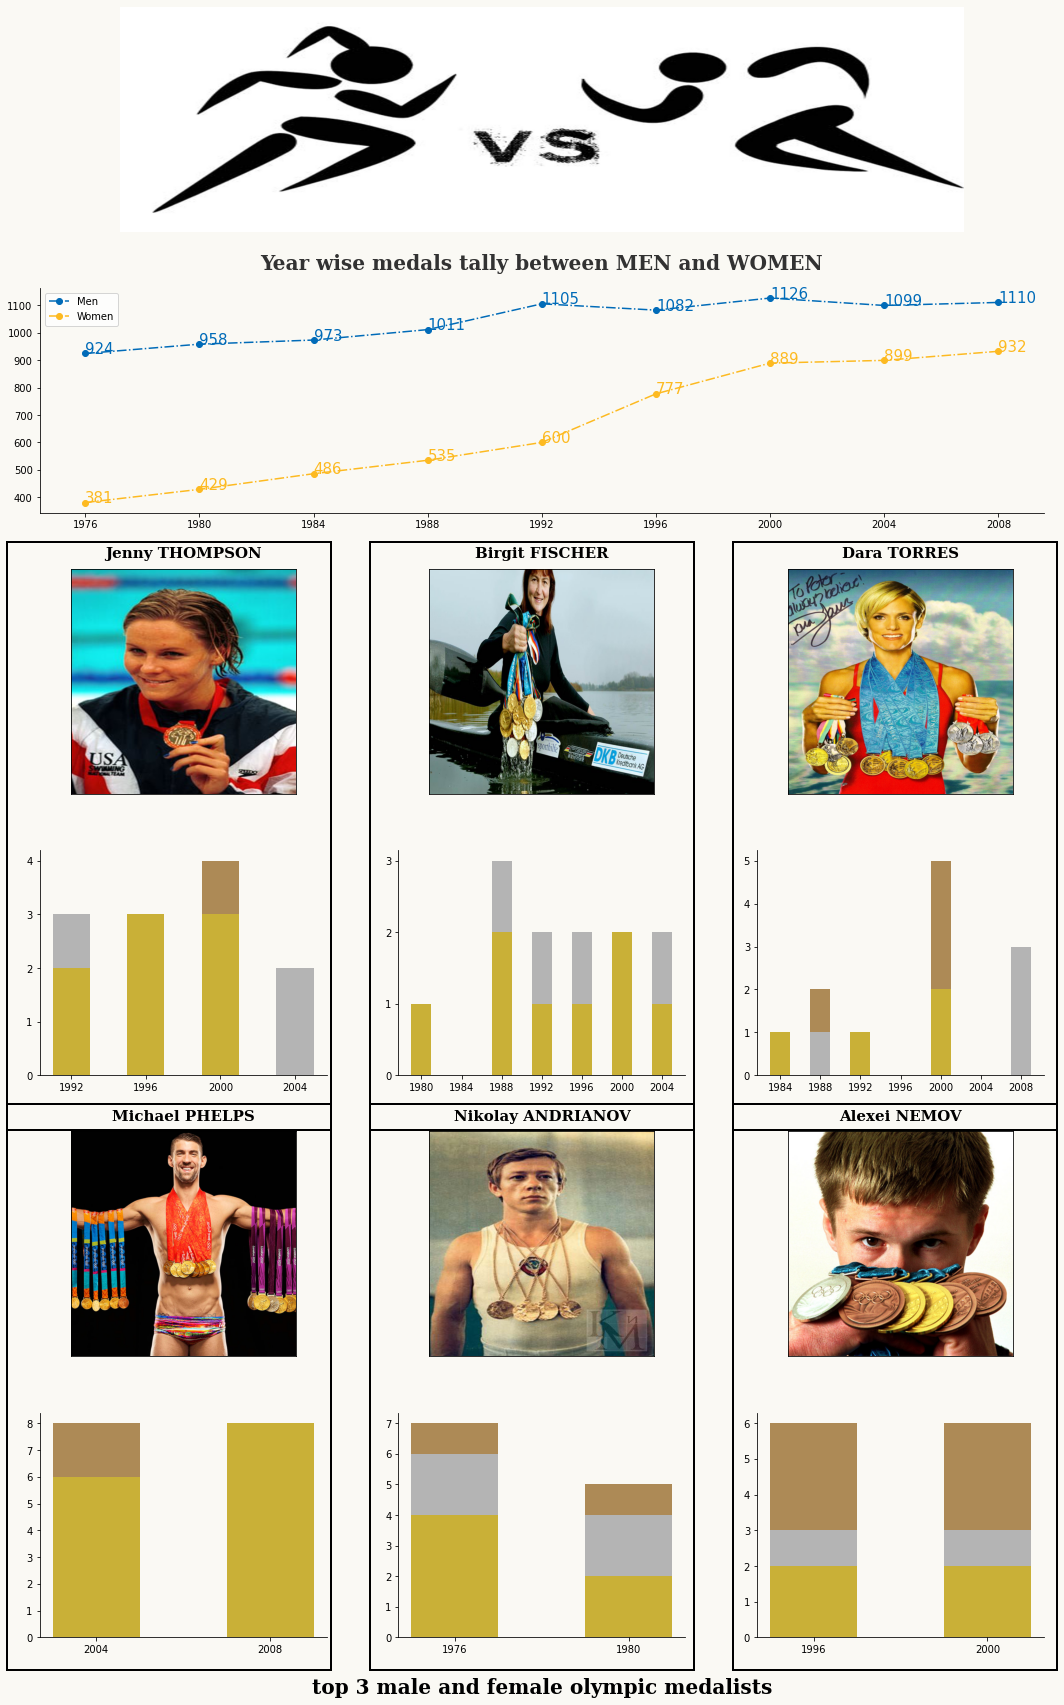

In [14]:
fig = plt.figure(figsize=(18,30),facecolor='#faf9f4')
gs = fig.add_gridspec(6,3)
gs.update(wspace=0.25, hspace=0.25)

func = lambda x : x['Gold']+x['Silver']+x['Bronze']
gold = lambda x : x['Gold']
silver = lambda x : x['Silver']+x['Gold']

ax0 = fig.add_subplot(gs[0, 0:])
ax1 = fig.add_subplot(gs[1 ,0:])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
ax4 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])
ax7 = fig.add_subplot(gs[3, 2])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])
ax10 = fig.add_subplot(gs[4, 2])
ax11 = fig.add_subplot(gs[5, 0])
ax12 = fig.add_subplot(gs[5, 1])
ax13 = fig.add_subplot(gs[5, 2])


background_color = '#faf9f4'
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color
ax7.set_facecolor(background_color) # axes background color
ax8.set_facecolor(background_color) # axes background color
ax9.set_facecolor(background_color) # axes background color
ax10.set_facecolor(background_color) # axes background color
ax11.set_facecolor(background_color) # axes background color
ax12.set_facecolor(background_color) # axes background color
ax13.set_facecolor(background_color) # axes background color


# AX0 - Men vs Women
img = Image.open(urlopen('https://i2.wp.com/sportsscientists.com/wp-content/uploads/2013/04/featured_women_vs_men.jpg?fit=620%2C350&ssl=1'))
img = img.resize((1500,400))
ax0.tick_params(left=False, bottom=False)
ax0.imshow(img)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
for s in ["top","right","left","bottom"]:
    ax0.spines[s].set_visible(False)


# AX1 - line plot
year,medals = [],[]
for i,j in sorted(total_gender_medals.items()):
    year.append(i)
    medals.append(total_gender_medals[i]['Men'])
ax1.plot(year,medals,marker='o',zorder=3,color='#006BB8',ls='-.')
for i,j in zip(year, medals):
    ax1.annotate(f'{j:0.0f}',xy=(i,j), color='#006BB8',fontsize=15)
    
year,medals = [],[]
for i,j in sorted(total_gender_medals.items()):
    year.append(i)
    medals.append(total_gender_medals[i]['Women'])
ax1.plot(year,medals,marker='o',zorder=3,color='#FDBA21',ls='-.')
for i,j in zip(year, medals):
    ax1.annotate(f'{j:0.0f}',xy=(i,j), color='#FDBA21',fontsize=15)
    
ax1.text(1992,1230,'Year wise medals tally between MEN and WOMEN',fontsize=20, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='center')
ax1.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax1.legend(['Men','Women'])


img = Image.open(urlopen(Jenny_THOMPSON))
img = img.resize((1000,1000))
ax2.tick_params(left=False, bottom=False)
ax2.imshow(img)
ax2.text(500, -50, 'Jenny THOMPSON', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax2.set_xticklabels([])
ax2.set_yticklabels([])


img = Image.open(urlopen(Birgit_FISCHER))
img = img.resize((1000,1000))
ax3.tick_params(left=False, bottom=False)
ax3.imshow(img)
ax3.text(500, -50, 'Birgit FISCHER', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax3.set_xticklabels([])
ax3.set_yticklabels([])


img = Image.open(urlopen(Dara_TORRES))
img = img.resize((1000,1000))
ax4.tick_params(left=False, bottom=False)
ax4.imshow(img)
ax4.text(500, -50, 'Dara TORRES', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax4.set_xticklabels([])
ax4.set_yticklabels([])


ax5.bar(top_3_medals['Jenny THOMPSON'].keys(), list(map(func,top_3_medals['Jenny THOMPSON'].values())) ,width=2 ,color=['#AD8A56'])
ax5.bar(list(top_3_medals['Jenny THOMPSON'].keys()),list(map(silver,top_3_medals['Jenny THOMPSON'].values())) ,width=2 , color ='#B4B4B4')
ax5.bar(list(top_3_medals['Jenny THOMPSON'].keys()),list(map(gold,top_3_medals['Jenny THOMPSON'].values())) ,width=2 , color ='#C9B037')
ax5.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax5.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax5.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(1))


ax6.bar(top_3_medals['Birgit FISCHER'].keys(), list(map(func,top_3_medals['Birgit FISCHER'].values())) ,width=2 ,color=['#AD8A56'])
ax6.bar(list(top_3_medals['Birgit FISCHER'].keys()),list(map(silver,top_3_medals['Birgit FISCHER'].values())) ,width=2 , color ='#B4B4B4')
ax6.bar(list(top_3_medals['Birgit FISCHER'].keys()),list(map(gold,top_3_medals['Birgit FISCHER'].values())) ,width=2 , color ='#C9B037')
ax6.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax6.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax6.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax6.yaxis.set_major_locator(mtick.MultipleLocator(1))


ax7.bar(top_3_medals['Dara TORRES'].keys(), list(map(func,top_3_medals['Dara TORRES'].values())) ,width=2 ,color=['#AD8A56'])
ax7.bar(list(top_3_medals['Dara TORRES'].keys()),list(map(silver,top_3_medals['Dara TORRES'].values())) ,width=2 , color ='#B4B4B4')
ax7.bar(list(top_3_medals['Dara TORRES'].keys()),list(map(gold,top_3_medals['Dara TORRES'].values())) ,width=2 , color ='#C9B037')
ax7.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax7.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax7.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(1))


img = Image.open(urlopen(url1))
img = img.resize((1000,1000))
ax8.tick_params(left=False, bottom=False)
ax8.imshow(img)
ax8.text(500, -50, 'Michael PHELPS', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax8.set_xticklabels([])
ax8.set_yticklabels([])


img = Image.open(urlopen(url6))
img = img.resize((1000,1000))
ax9.tick_params(left=False, bottom=False)
ax9.imshow(img)
ax9.text(500, -50, 'Nikolay ANDRIANOV', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax9.text(500, 2500, 'top 3 male and female olympic medalists', fontsize=20, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax9.set_xticklabels([])
ax9.set_yticklabels([])


img = Image.open(urlopen(url2))
img = img.resize((1000,1000))
ax10.tick_params(left=False, bottom=False)
ax10.imshow(img)
ax10.text(500, -50, 'Alexei NEMOV', fontsize=15, fontweight='bold', fontfamily='serif', horizontalalignment='center')
ax10.set_xticklabels([])
ax10.set_yticklabels([])


ax11.bar(top_3_medals['Michael PHELPS'].keys(), list(map(func,top_3_medals['Michael PHELPS'].values())) ,width=2 ,color=['#AD8A56'])
ax11.bar(list(top_3_medals['Michael PHELPS'].keys()),list(map(silver,top_3_medals['Michael PHELPS'].values())) ,width=2 , color ='#B4B4B4')
ax11.bar(list(top_3_medals['Michael PHELPS'].keys()),list(map(gold,top_3_medals['Michael PHELPS'].values())) ,width=2 , color ='#C9B037')
ax11.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax11.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax11.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax11.yaxis.set_major_locator(mtick.MultipleLocator(1))


ax12.bar(top_3_medals['Nikolay ANDRIANOV'].keys(), list(map(func,top_3_medals['Nikolay ANDRIANOV'].values())) ,width=2 ,color=['#AD8A56'])
ax12.bar(list(top_3_medals['Nikolay ANDRIANOV'].keys()),list(map(silver,top_3_medals['Nikolay ANDRIANOV'].values())) ,width=2 , color ='#B4B4B4')
ax12.bar(list(top_3_medals['Nikolay ANDRIANOV'].keys()),list(map(gold,top_3_medals['Nikolay ANDRIANOV'].values())) ,width=2 , color ='#C9B037')
ax12.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax12.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax12.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax12.yaxis.set_major_locator(mtick.MultipleLocator(1))


ax13.bar(top_3_medals['Alexei NEMOV'].keys(), list(map(func,top_3_medals['Alexei NEMOV'].values())) ,width=2 ,color=['#AD8A56'])
ax13.bar(list(top_3_medals['Alexei NEMOV'].keys()),list(map(silver,top_3_medals['Alexei NEMOV'].values())) ,width=2 , color ='#B4B4B4')
ax13.bar(list(top_3_medals['Alexei NEMOV'].keys()),list(map(gold,top_3_medals['Alexei NEMOV'].values())) ,width=2 , color ='#C9B037')
ax13.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax13.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax13.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax13.yaxis.set_major_locator(mtick.MultipleLocator(1))


rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.1, 0.11), 0.25, 0.262, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.38, 0.11), 0.25, 0.262, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.66, 0.11), 0.25, 0.262, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.1, 0.36), 0.25, 0.272, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.38, 0.36), 0.25, 0.272, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.66, 0.36), 0.25, 0.272, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

for s in ["top","right"]:
    ax1.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)
    ax12.spines[s].set_visible(False)
    ax13.spines[s].set_visible(False)

      
plt.show()

**go to [Index](#content)**

<div id='Chapter7'></div>

## 7.0 India at Olympics

India first participated at the Olympic Games in 1900, with a lone athlete Norman Pritchard winning two medals – both silver – in athletics and became the first Asian nation to win an Olympic medal.

The nation first sent a team to the Summer Olympic Games in 1920 and has participated in every Summer Games since then. India has also competed at several Winter Olympic Games beginning in 1964.

Indian athletes have won 35 medals, all at the Summer Games. For a period of time, Indian Men's Field Hockey Team was dominant in Olympic competition, winning eleven medals in twelve Olympics between 1928 and 1980. The run included eight gold medals of which six were won consecutively from 1928 to 1956.

In [15]:
year_medal = dict()
country_grouped_data = data.groupby(['Country'])
for i,j in country_grouped_data:
    if i == 'India':
        India_data = j.groupby(['Year'])
        for k,l in India_data:
            year_medal[k] = len(l)
        break

for i in np.unique(data.Year):
    if i not in year_medal:
        year_medal[i]=0
        
for i in year_medal.keys():
    year_medal = dict(sorted(year_medal.items()))


event_medals =dict()
for i,j in country_grouped_data:
    if i == 'India':
        for k in j.Sport:
            if k in event_medals:
                event_medals[k]+=1
            else:
                event_medals[k]=1

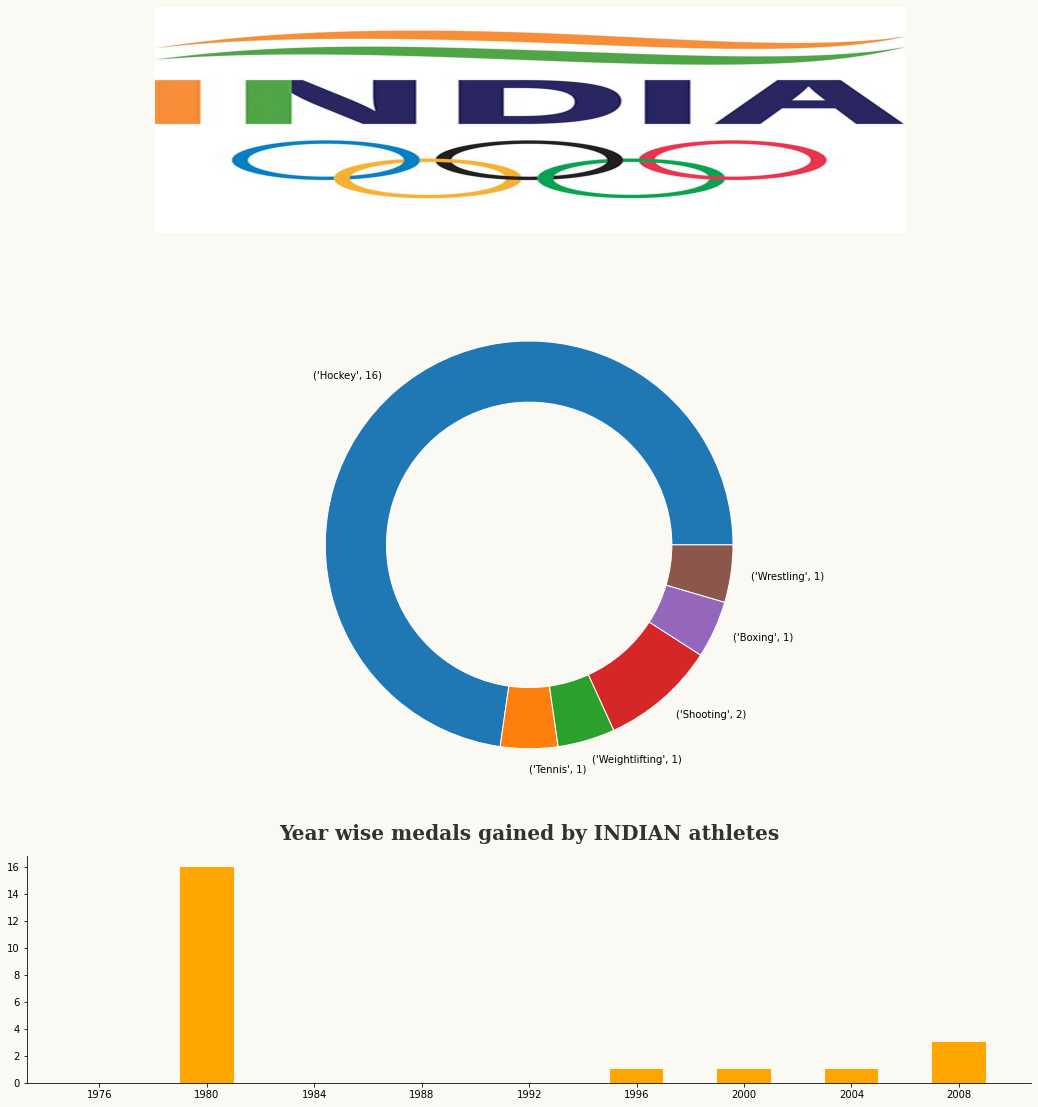

In [16]:
india = 'https://stillmed.olympics.com/media/Images/OlympicOrg/Countries/I/India/CNO-IND-2.jpg?interpolation=lanczos-none&resize=591:848'

fig = plt.figure(figsize=(18,25),facecolor='#faf9f4')
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.25, hspace=0.25)

ax0 = fig.add_subplot(gs[0, 0:])
ax1 = fig.add_subplot(gs[1:3, 0:])
ax2 = fig.add_subplot(gs[3, 0:])

background_color = '#faf9f4'
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color


img = Image.open(urlopen(india))
img = img.resize((4300,1300))
ax0.tick_params(left=False, bottom=False)
ax0.imshow(img)
ax0.spines[["top","right","bottom","left"]].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax1.pie(event_medals.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,labels=event_medals.items(), radius=1)

ax2.text(1992,18,'Year wise medals gained by INDIAN athletes',fontsize=20, fontweight='bold', fontfamily='serif',color="#323232", horizontalalignment='center')
ax2.bar(year_medal.keys(),year_medal.values() ,width=2 , color ='orange')
ax2.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax2.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax2.yaxis.set_major_formatter(mtick.ScalarFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(2))

for s in ["top","right"]:
    ax2.spines[s].set_visible(False)

plt.show()

In [17]:
%matplotlib inline
sns.set(palette="Paired")
plt.rcParams['figure.dpi'] = 120

**go to [Index](#content)**

<div id='Chapter8'></div>

## 8.0 top 10 medal winning nations

<div id='gold'></div>

### 8.1 top 10 gold winning countries

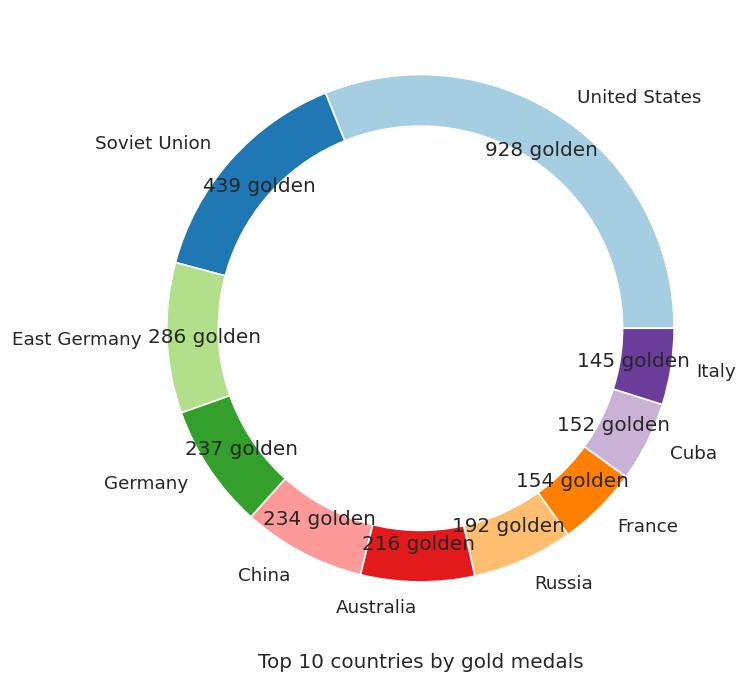

In [18]:
gold_country = data[data.Medal == 'Gold'].groupby(['Country']).Medal.size()
gold_top_10 = gold_country.sort_values(ascending = False)[:10]
plt.figure(figsize=(9,7))
top_10_gold_pie = plt.pie(gold_top_10, labels=gold_top_10.index, 
                             autopct= lambda x: f'{x*sum(gold_top_10.values)/100 :.0f} golden', pctdistance=0.85)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 10 countries by gold medals')
plt.show()

**go to [Index](#content)**

<div id='silver'></div>

### 8.2 top 10 silver winning countries

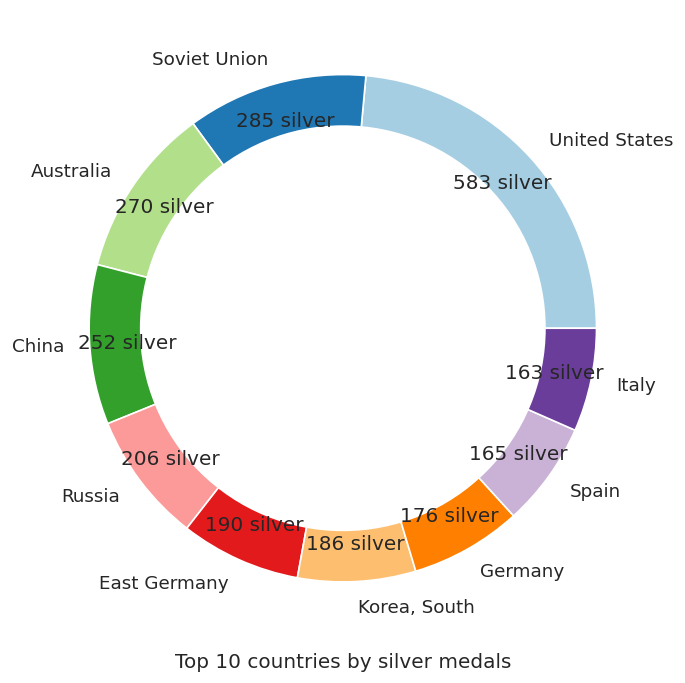

In [19]:
silver_country = data[data.Medal == 'Silver'].groupby(['Country']).Medal.size()
silver_top_10 = silver_country.sort_values(ascending = False)[:10]
plt.figure(figsize=(9,7))
top_10_silver_pie = plt.pie(silver_top_10, labels=silver_top_10.index, 
                             autopct= lambda x: f'{x*sum(silver_top_10.values)/100 :.0f} silver', pctdistance=0.85)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 10 countries by silver medals')
plt.show()

**go to [Index](#content)**

<div id='bronze'></div>

### 8.3 top 10 bronze winning countries

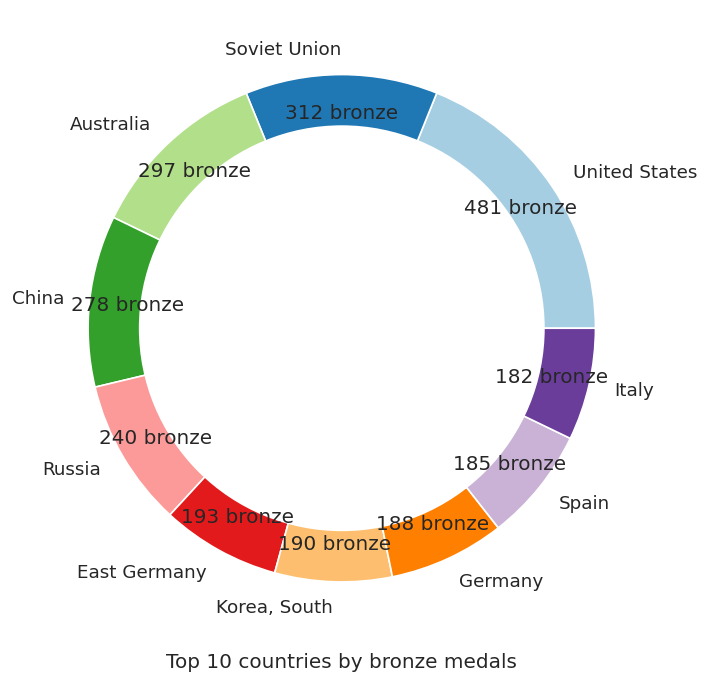

In [20]:
bronze_country = data[data.Medal == 'Bronze'].groupby(['Country']).Medal.size()
bronze_top_10 = bronze_country.sort_values(ascending = False)[:10]
plt.figure(figsize=(9,7))
top_10_bronze_pie = plt.pie(bronze_top_10, labels=silver_top_10.index, 
                             autopct= lambda x: f'{x*sum(bronze_top_10.values)/100 :.0f} bronze', pctdistance=0.85)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=0)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 10 countries by bronze medals')
plt.show()

**go to [Index](#content)**

<div id='Chapter9'></div>

## **9.0 Word Clouds**

**What is a word cloud?**

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is.

<div id='topsports'></div>

### **9.1 Top Sports**

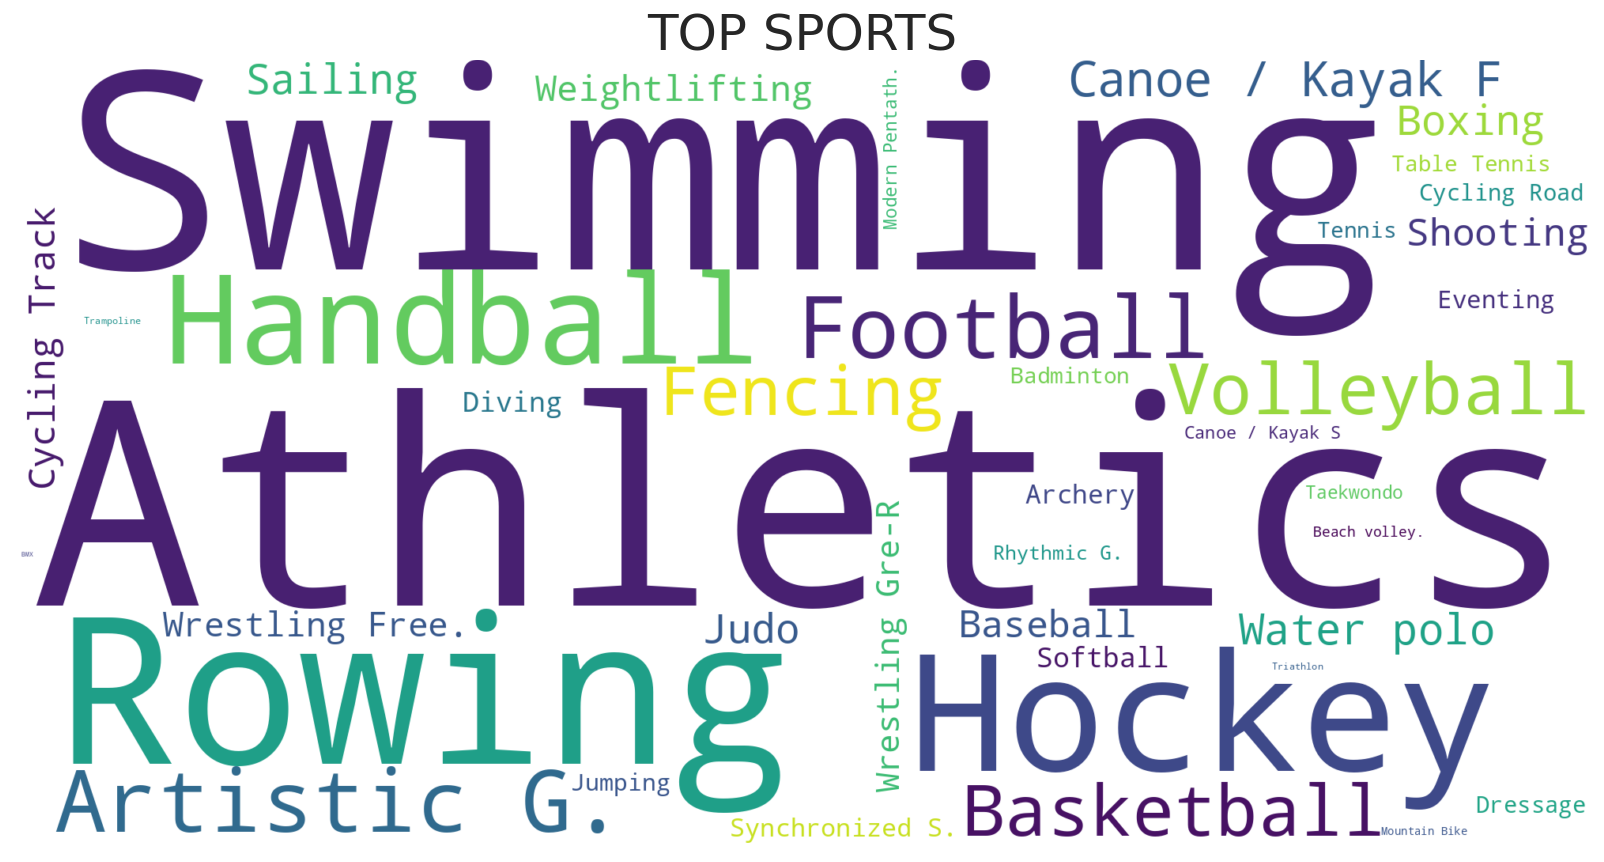

In [21]:
count_discipline = data.Discipline.value_counts()
count_discipline

sns.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = count_discipline)
plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('TOP SPORTS', fontsize = 30)
plt.show()

**go to [Index](#content)**

<div id='topathletes'></div>

### **9.2 Top Athletes**

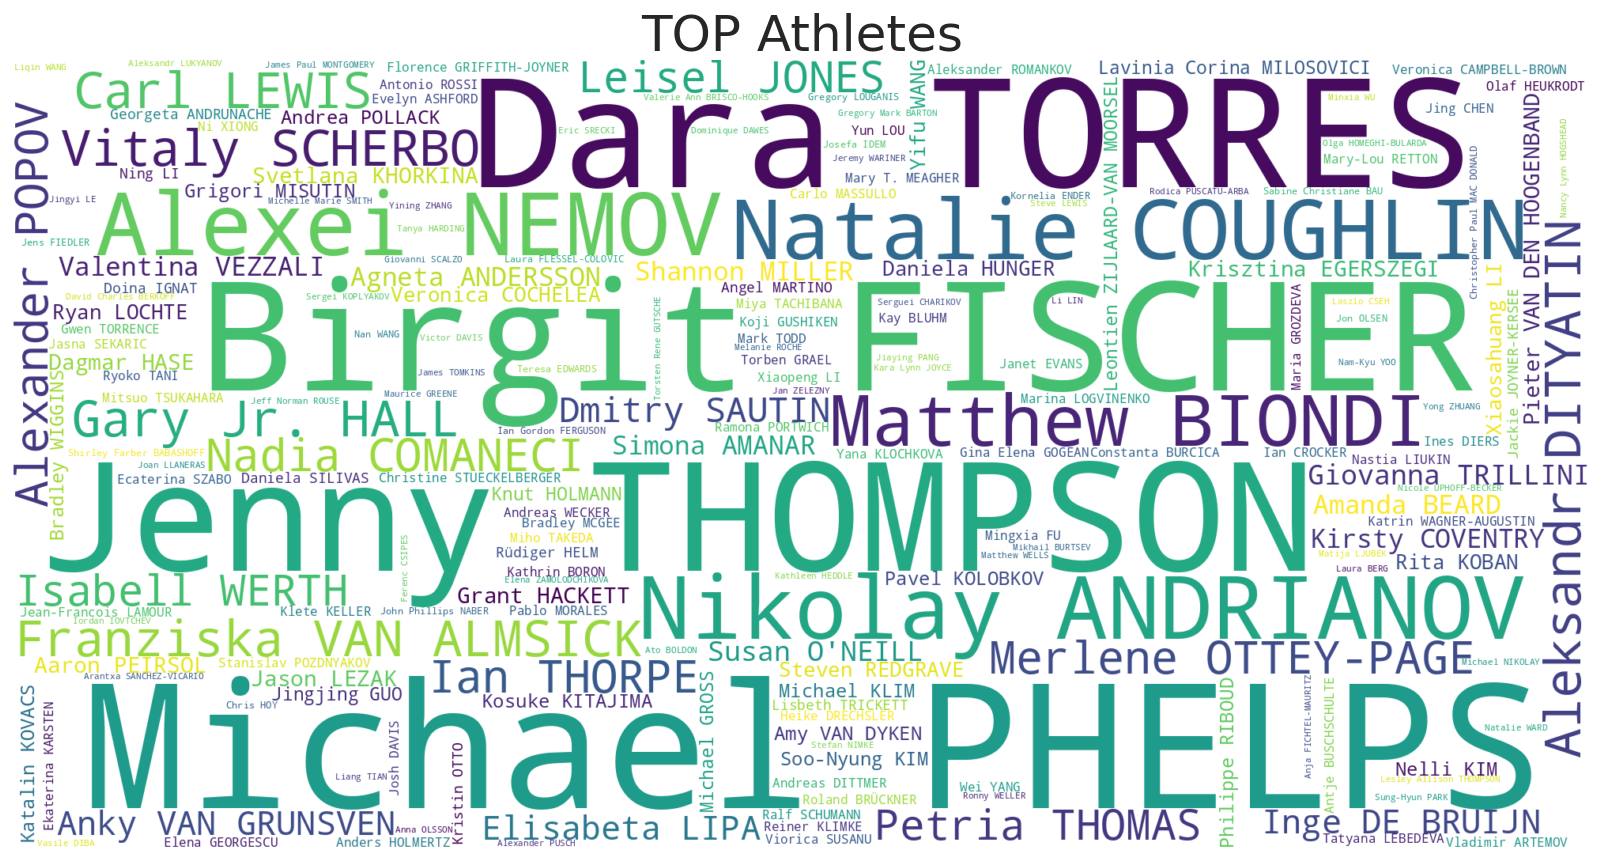

In [22]:
count_discipline = data.Athlete.value_counts()
count_discipline

sns.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = count_discipline)
plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('TOP Athletes', fontsize = 30)
plt.show()

**go to [Index](#content)**

<div id='topevents'></div>

### **9.3 Top Events**

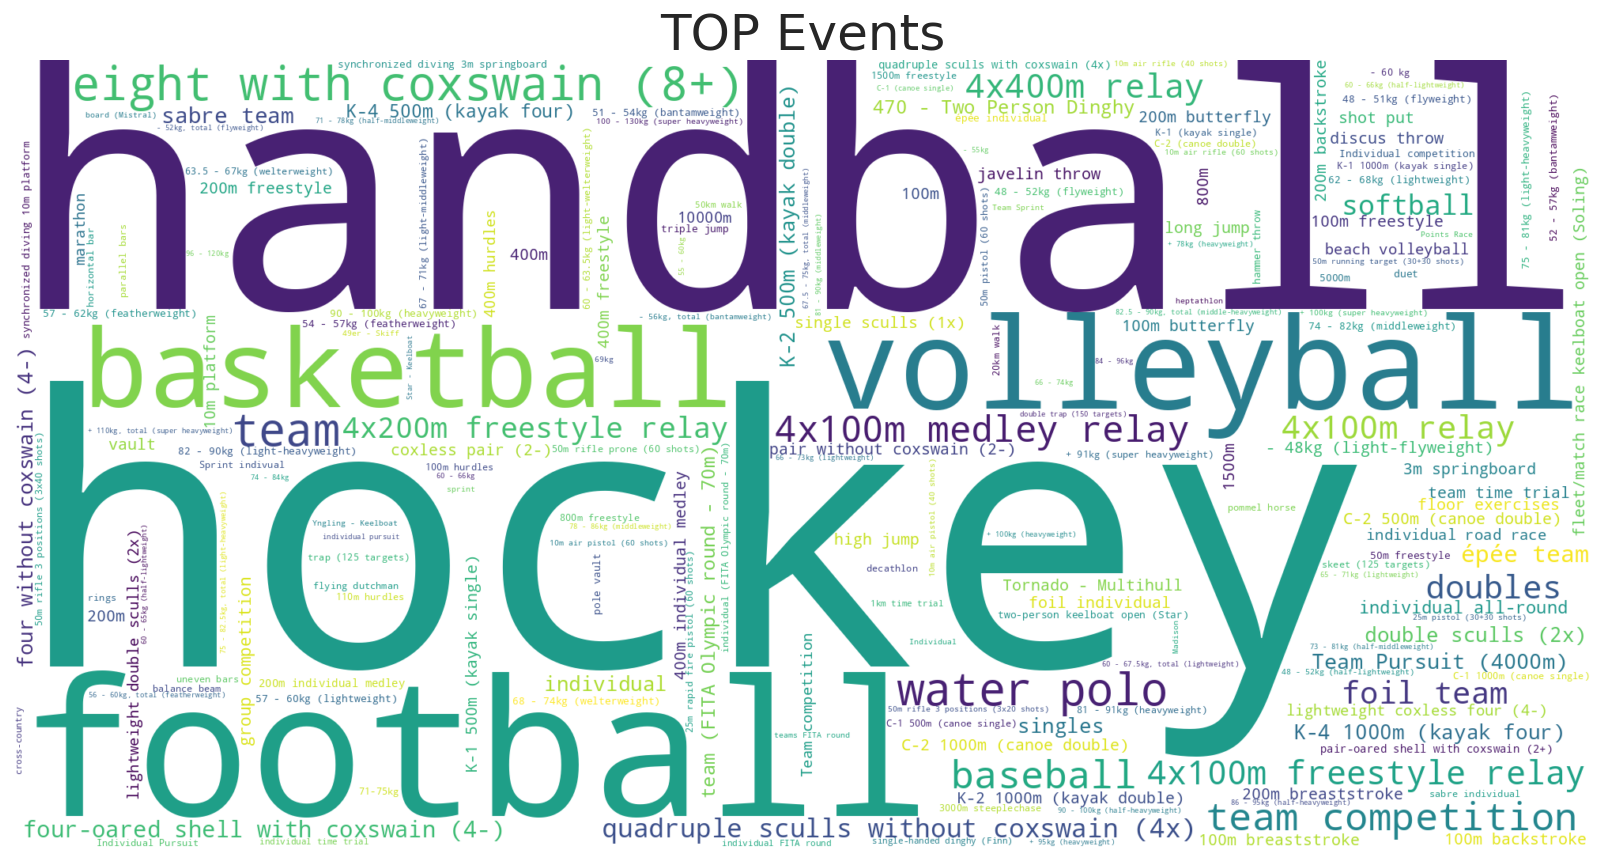

In [23]:
count_discipline = data.Event.value_counts()
count_discipline

sns.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = count_discipline)
plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('TOP Events', fontsize = 30)
plt.show()

**go to [Index](#content)**

<div id='Chapter10'></div>

## 10.0 Conclusion

**First of all, thank you so much for reading! If you liked my work, please, do not forget to leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)**

**If you want to ask something, feel free to comment!**

**go to [TOP](#top)**

<div id='bottom'></div>